In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ebooklib


     |████████████████████████████████| 112kB 2.9MB/s 
  Created wheel for ebooklib: filename=EbookLib-0.17.1-cp36-none-any.whl size=38163 sha256=3fe08c9e7ad61184eb89a4ea3e72577ca57fbda29934c6740953ac9cbd8be31e
  Stored in directory: /root/.cache/pip/wheels/84/11/01/951369cbbf8f96878786a1f4da68bd7ac19a5d945b38e03d54
Successfully built ebooklib


In [ ]:
from ebooklib import epub 
import ebooklib

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
def epub2html(epub_path):    
    book = epub.read_epub(epub_path)
    chapters = []
    #time both
    for items in book.get_items():
        if items.get_type() == ebooklib.ITEM_DOCUMENT:
            chapters.append(items.get_content())
    return chapters

In [ ]:
def extractquote(chap):
    output = ''
    soup = BeautifulSoup(chap, 'html.parser')
    text = soup.find_all('em')
    for i in text:
        output+= '{}'.format(i.get_text())
    return output

In [ ]:
path1 = '/home/olamide/Downloads/ok.epub'
path2 = '/home/olamide/Downloads/ok2.epub'
path ='/content/drive/My Drive/ok1.epub'

In [ ]:
chapters = epub2html(path)
quotes = []

dir(BeautifulSoup(text, 'html.parser'))

In [ ]:
for text in chapters:
    t = extractquote(text)
    quotes.append(t)

In [ ]:
for i in quotes:
    if len(i)<2:
        quotes.remove(i)

In [ ]:
quotes

['PolitykaSFXBlood of Elves',
 'The Last WishBlood of Elves',
 'Verily I say unto you, the era of the sword and axe is nigh, the era of the wolf’s blizzard. The Time of the White Chill and\n            the White Light is nigh, the Time of Madness and the Time of Contempt: Tedd Deireádh, the Time of End. The world will die\n            amidst frost and be reborn with the new sun. It will be reborn of the Elder Blood, of Hen Ichaer, of the seed that has been\n            sown. A seed which will not sprout but will burst into flame.Ess’tuath esse! Thus it shall be! Watch for the signs! What signs these shall be, I say unto you: first the earth will flow\n            with the blood of Aen Seidhe, the Blood of Elves…Ithlinne Aegli aep Aevenien’s prophecy',
 'Fear.Fear.Hold on!Hold on!Fear.Fear!Help! Why doesn’t anyone help me? Alone, weak, helpless – I can’t move, can’t force a sound from my constricted throat. Why\n            does no one come to help me?I’m terrified!I can hear music,Amid

In [ ]:
data =''
for i in quotes:
    data+= f' {i} '
    

In [ ]:
data

' PolitykaSFXBlood of Elves  The Last WishBlood of Elves  Verily I say unto you, the era of the sword and axe is nigh, the era of the wolf’s blizzard. The Time of the White Chill and\n            the White Light is nigh, the Time of Madness and the Time of Contempt: Tedd Deireádh, the Time of End. The world will die\n            amidst frost and be reborn with the new sun. It will be reborn of the Elder Blood, of Hen Ichaer, of the seed that has been\n            sown. A seed which will not sprout but will burst into flame.Ess’tuath esse! Thus it shall be! Watch for the signs! What signs these shall be, I say unto you: first the earth will flow\n            with the blood of Aen Seidhe, the Blood of Elves…Ithlinne Aegli aep Aevenien’s prophecy  Fear.Fear.Hold on!Hold on!Fear.Fear!Help! Why doesn’t anyone help me? Alone, weak, helpless – I can’t move, can’t force a sound from my constricted throat. Why\n            does no one come to help me?I’m terrified!I can hear music,Amidst the ru

In [ ]:
ok = []
for i in data:
    ok.append(i.strip())
corpus = data.lower().split('\n')

In [ ]:
corpus=ok
ok

['politykasfxblood of elves  the last wishblood of elves  verily i say unto you, the era of the sword and axe is nigh, the era of the wolf’s blizzard. the time of the white chill and',
 'the white light is nigh, the time of madness and the time of contempt: tedd deireádh, the time of end. the world will die',
 'amidst frost and be reborn with the new sun. it will be reborn of the elder blood, of hen ichaer, of the seed that has been',
 'sown. a seed which will not sprout but will burst into flame.ess’tuath esse! thus it shall be! watch for the signs! what signs these shall be, i say unto you: first the earth will flow',
 'with the blood of aen seidhe, the blood of elves…ithlinne aegli aep aevenien’s prophecy  fear.fear.hold on!hold on!fear.fear!help! why doesn’t anyone help me? alone, weak, helpless – i can’t move, can’t force a sound from my constricted throat. why',
 'does no one come to help me?i’m terrified!i can hear music,amidst the rustling of the trees… there’s music. lute musi

In [ ]:
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(corpus)

In [ ]:
total_words = len(tokenizer.word_index)+1

In [ ]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        #breaking the words down into phrases
        n_gram_sequences = token_list[:i+1]
        input_sequences.append(n_gram_sequences)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
longest = len(input_sequences[:-1])
input_sequences= np.array(pad_sequences(input_sequences, maxlen=longest, padding='pre'))

In [ ]:
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

In [ ]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = tf.keras.Sequential(
[
    tf.keras.layers.Embedding(total_words, 100, input_length=longest-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(total_words,activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(xs,ys, epochs=100, verbose=1)

Epoch 1/100
81/81 [==============================] - 24s 299ms/step - loss: 4.9275 - accuracy: 0.0708
Epoch 2/100
81/81 [==============================] - 24s 300ms/step - loss: 4.1890 - accuracy: 0.0874
Epoch 3/100
81/81 [==============================] - 24s 300ms/step - loss: 4.1750 - accuracy: 0.0867
Epoch 4/100
81/81 [==============================] - 24s 301ms/step - loss: 4.1306 - accuracy: 0.0940
Epoch 5/100
81/81 [==============================] - 24s 300ms/step - loss: 4.0716 - accuracy: 0.1091
Epoch 6/100
81/81 [==============================] - 24s 300ms/step - loss: 4.0195 - accuracy: 0.1145
Epoch 7/100
81/81 [==============================] - 24s 300ms/step - loss: 3.9664 - accuracy: 0.1222
Epoch 8/100
81/81 [==============================] - 24s 300ms/step - loss: 3.9088 - accuracy: 0.1296
Epoch 9/100
81/81 [==============================] - 24s 300ms/step - loss: 3.8681 - accuracy: 0.1338
Epoch 10/100
81/81 [==============================] - 24s 301ms/step - loss: 3.826

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.show()


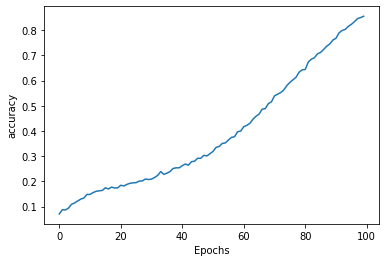

In [ ]:
plot_graphs(history,'accuracy')

In [ ]:
seed_text = "I say unto you"
next_words = 50
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=longest-1, padding='pre')
    predicted = model.predict_classes(token_list,verbose=0)
    output_words= ""
    for word , index in tokenizer.word_index.items():
        if index == predicted:
            output_words = word
            break
    seed_text += " "+ output_words
            

In [ ]:
model.save('m.h5')

In [ ]:
tokenizer.word_index.items()


dict_items([('<OOV>', 1), ('the', 2), ('and', 3), ('to', 4), ('i', 5), ('of', 6), ('a', 7), ('you', 8), ('in', 9), ('that', 10), ('is', 11), ('me', 12), ('be', 13), ('it', 14), ('have', 15), ('not', 16), ('for', 17), ('as', 18), ('will', 19), ('no', 20), ('they', 21), ('with', 22), ('her', 23), ('on', 24), ('one', 25), ('what', 26), ('all', 27), ('we', 28), ('there', 29), ('which', 30), ('but', 31), ('from', 32), ('my', 33), ('don’t', 34), ('can', 35), ('she', 36), ('so', 37), ('i’m', 38), ('at', 39), ('are', 40), ('your', 41), ('his', 42), ('was', 43), ('who', 44), ('about', 45), ('if', 46), ('–', 47), ('were', 48), ('them', 49), ('geralt', 50), ('or', 51), ('has', 52), ('like', 53), ('us', 54), ('he', 55), ('this', 56), ('too', 57), ('i’ll', 58), ('going', 59), ('know', 60), ('write', 61), ('time', 62), ('child', 63), ('did', 64), ('see', 65), ('without', 66), ('never', 67), ('witcher', 68), ('do', 69), ('want', 70), ('it’s', 71), ('why', 72), ('that’s', 73), ('into', 74), ('well', 7

In [ ]:
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
seed_text

'I say unto you was that not have to them by so why you you that you that you have a you a at the as if i were the for if they were as going to you about come and you you that you i’m with me it is you have a you'